# Predicting Insurance Premiums using Machine Learning

---

The problem covered in this notebook is quite a common one in Data Science. Suppose we work at an insurance company as analysts; our task is to allocate appropriate premium charges for our clients; given the indicators (and response variable) in our historical dataset -  `insurance.csv`. 

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [55]:
df = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1336 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [57]:
# NULL data points filled with standard value of zero(0)
df = df.fillna(0)

# Changing the dtypes appropriately for data exploration

df['children'] = df['children'].astype(int)

unique_values = df['smoker'].unique()
value_map = {}
for i, value in enumerate(unique_values):
    value_map[value] = i + 1
df['smoker_bool'] = df['smoker'].replace(value_map)

unique_values = df['sex'].unique()
value_map = {}
for i, value in enumerate(unique_values):
    value_map[value] = i + 1
df['sex_bool'] = df['sex'].replace(value_map)

unique_values = df['region'].unique()
value_map = {}
for i, value in enumerate(unique_values):
    value_map[value] = i + 1
df['region_cat'] = df['region'].replace(value_map)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_bool  1338 non-null   int64  
 8   sex_bool     1338 non-null   int64  
 9   region_cat   1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


,age,sex,bmi,children,smoker,region,charges,smoker_bool,sex_bool,region_cat
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,2,2,2
2,28,male,33.000,3,no,southeast,4449.46200,2,2,2
3,33,male,22.705,0,no,northwest,21984.47061,2,2,3
4,32,male,28.880,0,no,northwest,3866.85520,2,2,3



## Machine Learning Models
---
Evaluation Metrics: Model Score(R^2) and Root Mean Square Error(RMSE)


### Linear Regression


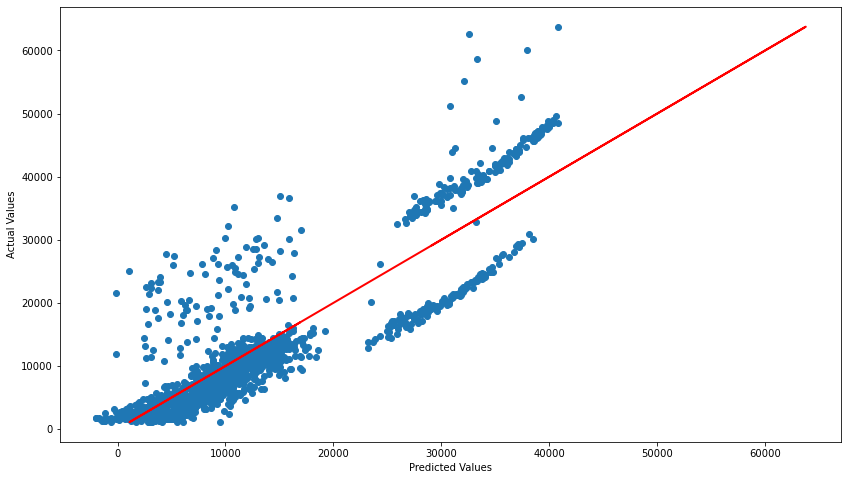

Model score: 0.7999876970680435
RMSE: 5641.626558850189


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
X = data.drop(['charges'], axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

X = sm.add_constant(X)
regressor = sm.OLS(y, X)
results = regressor.fit()
plt.figure(figsize=(14, 8))
plt.scatter(results.predict(X), y)
plt.plot(y, y, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Model score:', r2)
print('RMSE:', rmse)

By merely implementing a basic Linear Regression model, we were able to obtain a Model score of 0.8 and a RMSE value of 5641.63. IDEALLY, all the points would lie on the red line. However, that is almost never the case in real life, especially with something as unpredictable as insurance charges. As such, we see that the data points lie quite 'randomly' away from the red line (y=x). Moving forward, we must try to reduce this 'randomness' by using more complex algorithms in ML models.


### Decision Tree


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import mean_squared_error, r2_score

insurance_df = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')
def preprocess_inputs(df):
    df = df.copy()
    y = df['charges']
    X = df.drop('charges', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_inputs(insurance_df)
nominal_features = ['sex', 'smoker', 'region']

nominal_transformer = Pipeline(steps=[ ('onehot', OneHotEncoder(sparse=False, drop='if_binary'))])

preprocessor = ColumnTransformer(transformers=[('nominal', nominal_transformer, nominal_features)], remainder='passthrough')

model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('scaler', StandardScaler()), 
                        ('regressor', DecisionTreeRegressor(max_depth=5, 
                        min_samples_split=10))])model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Model score:', r2)
print('RMSE:', rmse)

Model score: 0.7838590283161899
RMSE: 5680.287184546198


The Decision Tree model is moderately effective in predicting insurance charges. Its predictions are, on average, about $ 5743.67 off from the actual charges, based on the root mean square error (RMSE) value.

Its Model score tellus us that approximately 77 percent of the variation in the target variable (charges) can be explained by the input features in the model. This means the model is capable of capturing a significant portion of the variation in charges, which is a good indication of its predictive capability.

Though, its performance seems to be consistent with that of a basic linear regression model. 


### Extreme Gradient Boosting (XGBoost)


In [94]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)

# Dropping the original categorical features
data = data.drop(cat_features, axis=1)

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training an XGBoost model on the TRAIN data
model = xgb.XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Evaluating model on the testing data
score = model.score(X_test, y_test)
print("Model score:", score)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model score: 0.8497768722564931
RMSE: 4829.280487081496


In [93]:
data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


With a Model Score of 84.9%, this implementation of a "Baseline" XGBoost alone, serves as our MOST ACCURATE Machine Learning prediction model. We have a much better measure of how well the model fits the data. Additionally, the Root Mean Square value shows that the average deviation of the predictions from the actual values is only $ 4829.28 now. 

---
As our chosen model, we proceed to use the insights gained earlier from EDA and Tableau to strengthen its predictive power.


In [103]:
# Improving the model by including various 'FEATURE IMORTANCE', based on our EDA

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# Compute charges using linear regression models for smokers and non-smokers (against bmi and age)

charges_bmi = []
charges_age = []
for i in range(len(data)):
    if data.loc[i, 'smoker'] == 'yes':
        charges_bmi.append(1473.11 * data.loc[i, 'bmi'] - 13186.6)
        charges_age.append(305.238 * data.loc[i, 'age'] + 20294.1)
    else:
        charges_bmi.append(83.3506 * data.loc[i, 'bmi'] + 5879.42)
        charges_age.append(267.249 * data.loc[i, 'age'] - 2091.42)

data['charges_bmi'] = charges_bmi
data['charges_age'] = charges_age

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(cat_features, axis=1)

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set the weights for the smoker, bmi, and age variables to be higher for smokers
sample_weights = []
for i in range(len(X_train)):
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights.append(1.75)
    else:
        sample_weights.append(1)
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights[i] *= (X_train.iloc[i]['charges_bmi'] / np.mean(X_train['charges_bmi']))
        sample_weights[i] *= (X_train.iloc[i]['charges_age'] / np.mean(X_train['charges_age']))

# Training an XGBoost model on the TRAIN data
model = xgb.XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.011, random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# Evaluating model on the testing data
score = model.score(X_test, y_test)
print("Model score:", score)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Model score: 0.9084104495227839
RMSE: 3554.6690985856867



#### By introducing additional hyperparameters such as 'charges_bmi' and 'charges_age' under the  categorisation of boolean smoker values, we are able to develop a stronger XGBoost model (with better XGBRegressor arguments as well). The EDA we conducted gave us insights on the influence of BMI, Age and Smoker variables. Therefore, by adding "weights" appropriately to these factors and applying linear trends observed, our improved model has a Model Score of over 90% and a much lower RMSE value of 3554.67

---

In [104]:
data

,age,bmi,children,charges,charges_bmi,charges_age,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,27913.169000,26093.622,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,8694.169762,2719.062,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,8629.989800,5391.552,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,7771.895373,6727.797,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,8286.585328,6460.548,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,8460.788082,11271.030,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,8539.971152,2719.062,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,8950.889610,2719.062,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,8029.865480,3520.809,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# "BASELINE" Model (with callable function)

import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(cat_features, axis=1)

# Training an XGBoost model on the entire dataset
model = xgb.XGBRegressormodel = xgb.XGBRegressor(n_estimators=1000, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(data.drop('charges', axis=1), data['charges'])

def predict_charges(age, sex, bmi, children, smoker, region):
    # Converting the input values into a pandas dataframe
    input_df = pd.DataFrame({'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]})

    # One-hot encoding: for categorical features
    one_hot_encoded = pd.DataFrame(one_hot_encoder.transform(input_df[cat_features]))
    one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
    input_df = pd.concat([input_df, one_hot_encoded], axis=1)
    input_df = input_df.drop(cat_features, axis=1)

    # Use TRAINED XGBoost model to predict the charges
    prediction = model.predict(input_df)[0]
    return prediction


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
# Improved Model (with callable function)

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('/Users/kauthar/Desktop/insurance.csv')

# Compute charges using linear regression models for smokers and non-smokers (against bmi and age)
charges_bmi = []
charges_age = []
for i in range(len(data)):
    if data.loc[i, 'smoker'] == 'yes':
        charges_bmi.append(1473.11 * data.loc[i, 'bmi'] - 13186.6)
        charges_age.append(305.238 * data.loc[i, 'age'] + 20294.1)
    else:
        charges_bmi.append(83.3506 * data.loc[i, 'bmi'] + 5879.42)
        charges_age.append(267.249 * data.loc[i, 'age'] - 2091.42)

data['charges_bmi'] = charges_bmi
data['charges_age'] = charges_age

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(sparse=False)
cat_features = ['sex', 'smoker', 'region']
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(data[cat_features]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
data = pd.concat([data, one_hot_encoded], axis=1)
data = data.drop(cat_features, axis=1)

# Splitting the data into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the weights for the smoker, bmi, and age variables to be higher for smokers
sample_weights = []
for i in range(len(X_train)):
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights.append(0.75)
    else:
        sample_weights.append(1)
    if X_train.iloc[i]['smoker_yes'] == 1:
        sample_weights[i] *= (X_train.iloc[i]['charges_bmi'] / np.mean(X_train['charges_bmi']))
        sample_weights[i] *= (X_train.iloc[i]['charges_age'] / np.mean(X_train['charges_age']))

# Training an XGBoost model on the entire dataset
model = xgb.XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.011, random_state=42)
model.fit(data.drop('charges', axis=1), data['charges'])

def IMPROVED_predict_charges(age, sex, bmi, children, smoker, region):
    # Compute charges using linear regression models for smokers and non-smokers (against bmi and age)
    if smoker == 'yes':
        charges_bmi = 1473.11 * bmi - 13186.6
        charges_age = 305.238 * age + 20294.1
    else:
        charges_bmi = 83.3506 * bmi + 5879.42
        charges_age = 267.249 * age - 2091.42

    # Converting the input values into a pandas dataframe
    input_df = pd.DataFrame({'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region], 'charges_bmi': [charges_bmi], 'charges_age': [charges_age]})

    # One-hot encoding for categorical features
    one_hot_encoded = pd.DataFrame(one_hot_encoder.transform(input_df[cat_features]))
    one_hot_encoded.columns = one_hot_encoder.get_feature_names(cat_features)
    input_df = pd.concat([input_df, one_hot_encoded], axis=1)
    input_df = input_df.drop(cat_features, axis=1)

    # Use TRAINED XGBoost model to predict the charges
    prediction = model.predict(input_df)[0]
    return prediction


/Users/kauthar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



### Tool for Insurance Analysts
---


In [108]:
import ipywidgets as widgets
from IPython.display import display

# Create widgets for input
age_widget = widgets.IntSlider(description="Age:", min=18, max=100, value=30, style={'description_width': 'initial'})
sex_widget = widgets.Dropdown(options=[('Male', 'male'), ('Female', 'female')], description="Sex:", style={'description_width': 'initial'})
bmi_widget = widgets.FloatText(description="BMI:", min=10, max=50, value=20, style={'description_width': 'initial'})
children_widget = widgets.IntSlider(description="Children:", min=0, max=10, value=0, style={'description_width': 'initial'})
smoker_widget = widgets.Dropdown(options=[('No', 'no'), ('Yes', 'yes')], description="Smoker:", style={'description_width': 'initial'})
region_widget = widgets.Dropdown(options=[('Northeast', 'northeast'), ('Northwest', 'northwest'), ('Southeast', 'southeast'), ('Southwest', 'southwest')], description="Region:", style={'description_width': 'initial'})

# Define a function to handle user input
def handle_submit(sender):
    # Get the current values of widgets
    age_value = age_widget.value
    sex_value = sex_widget.value
    bmi_value = bmi_widget.value
    children_value = children_widget.value
    smoker_value = smoker_widget.value
    region_value = region_widget.value
    print(str(age_value)+" year old "+sex_value+" with "+str(children_value)+" child(ren), living in the "+region_value)
    print("BMI -> "+str(bmi_value))
    print("Smoker? "+smoker_value)
    
    # Call the predict_charges function with user input
    IMPROVED_predicted_charges = IMPROVED_predict_charges(age_value, sex_value, bmi_value, children_value, smoker_value, region_value)

    # Display the predicted charges
    print('Predicted charges: $', round(IMPROVED_predicted_charges, 2))

# Define a button to submit user input
submit_button = widgets.Button(description='Predict Charges', button_style='success')
submit_button.on_click(handle_submit)

# Display the input widgets and submit button
display(age_widget, sex_widget, bmi_widget, children_widget, smoker_widget, region_widget, submit_button)


IntSlider(value=30, description='Age:', min=18, style=SliderStyle(description_width='initial'))

Dropdown(description='Sex:', options=(('Male', 'male'), ('Female', 'female')), style=DescriptionStyle(descript…

FloatText(value=20.0, description='BMI:', style=DescriptionStyle(description_width='initial'))

IntSlider(value=0, description='Children:', max=10, style=SliderStyle(description_width='initial'))

Dropdown(description='Smoker:', options=(('No', 'no'), ('Yes', 'yes')), style=DescriptionStyle(description_wid…

Dropdown(description='Region:', options=(('Northeast', 'northeast'), ('Northwest', 'northwest'), ('Southeast',…

Button(button_style='success', description='Predict Charges', style=ButtonStyle())

User Test Cases (index) : 100